In [65]:
import numpy as np
import pandas as pd
import nltk
import re
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:

import nltk
nltk.download('stopwords')


In [7]:
df = pd.read_csv("newsCorpora.csv",delimiter='\t',header=None)
df.columns = ['ID','TITLE','URL','PUBLISHER','CATEGORY','STORY','HOSTNAME','TIMESTAMP']
df.to_csv('newsfeed.csv')

In [8]:
df = pd.read_csv("newsfeed.csv")

In [9]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [10]:
df.columns

Index(['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME',
       'TIMESTAMP'],
      dtype='object')

In [11]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='ms')

In [67]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,tokens,Test
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-03-10 16:52:50.698,"[Fed, official, says, weak, data, caused, by, ...","[fed, official, say, weak, data, caused, weath..."
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-03-10 16:52:51.207,"[Fed, s, Charles, Plosser, sees, high, bar, fo...","[fed, 's, charles, plosser, see, high, bar, ch..."
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.550,"[US, open, Stocks, fall, after, Fed, official,...","[u, open, stock, fall, fed, official, hint, ac..."
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.793,"[Fed, risks, falling, behind, the, curve, Char...","[fed, risk, falling, 'behind, curve, charles, ..."
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-03-10 16:52:52.027,"[Fed, s, Plosser, Nasty, Weather, Has, Curbed,...","[fed, 's, plosser, nasty, weather, curbed, job..."


In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [13]:
df.groupby('CATEGORY').ID.count()

CATEGORY
b    115967
e    152469
m     45639
t    108344
Name: ID, dtype: int64

In [37]:
publisherdf =df.groupby("PUBLISHER").ID.count()

In [26]:
df['PUBLISHER'].nunique()

10985

In [42]:
def emphasize(s):
    red = '\x1b[1;31m'
    stop = '\x1b[0m'
    return red + str(s) + stop

nunique = df['PUBLISHER'].nunique()

from collections import Counter
for key, value in Counter(df['PUBLISHER']).most_common(5):
    print("   {} posted {} articles".format(emphasize(key), emphasize(value)))

   Reuters posted 3902 articles
   Huffington Post posted 2455 articles
   Businessweek posted 2395 articles
   Contactmusic.com posted 2334 articles
   Daily Mail posted 2254 articles


In [54]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string 
import nltk
import re

In [55]:
def tokenize( s, lemmatize=True, decode=False):
    try:
        if decode:
            s = s.decode("utf-8")
        tokens = word_tokenize(s.lower())
    except LookupError:
        nltk.download('punkt')
        tokenize(s)
    ignored = stopwords.words("english") + [punct for punct in string.punctuation]
    clean_tokens = [token for token in tokens if token not in ignored]
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        return [lemmatizer.lemmatize(token) for token in clean_tokens]
    return clean_tokens

In [61]:
df['Test']=df['TITLE'].apply(lambda X:tokenize(X))

In [72]:
Business=df[df['CATEGORY']=='b']['Test']

In [73]:
Health=df[df['CATEGORY']=='m']['Test']

In [74]:
Science=df[df['CATEGORY']=='t']['Test']

In [75]:
Entert=df[df['CATEGORY']=='e']['Test']

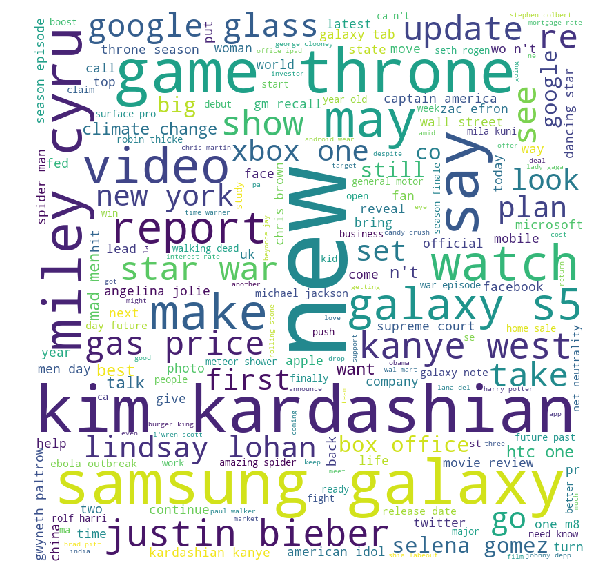

In [68]:
#Applying word cloud for full data set
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(df.Test.to_string()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

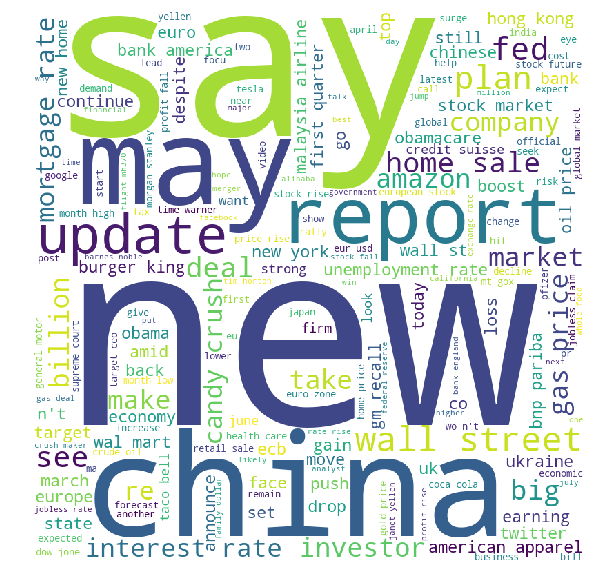

In [76]:
#Applying word cloud for Business dataset 
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(Business.to_string()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

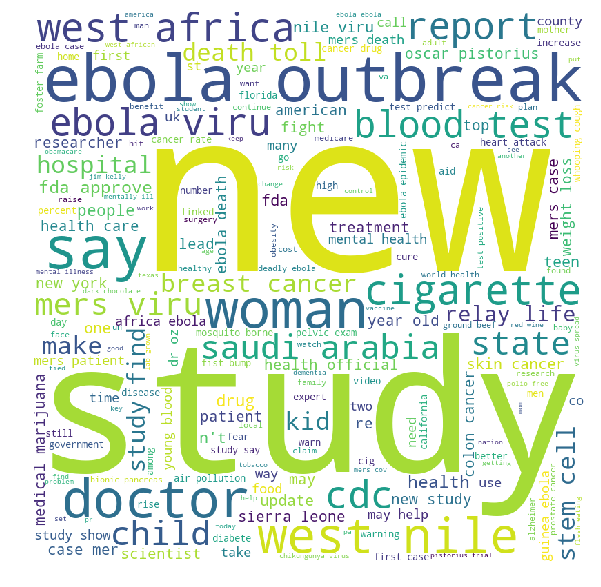

In [77]:
#Applying word cloud for Health dataset 
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(Health.to_string()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

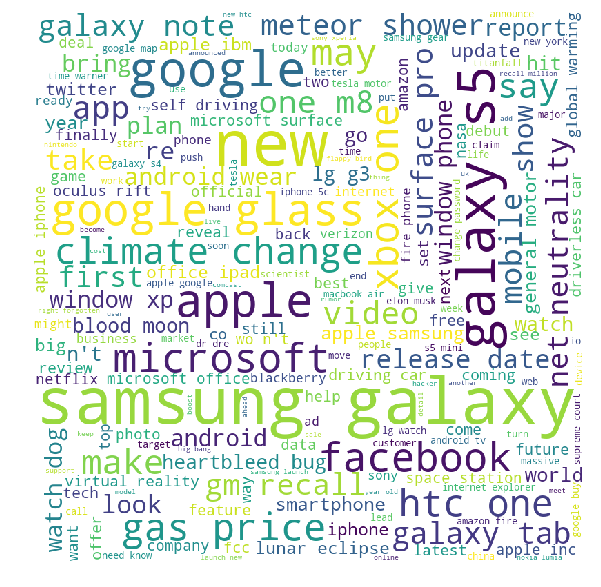

In [78]:
#Applying word cloud for Science dataset 
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(Science.to_string()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

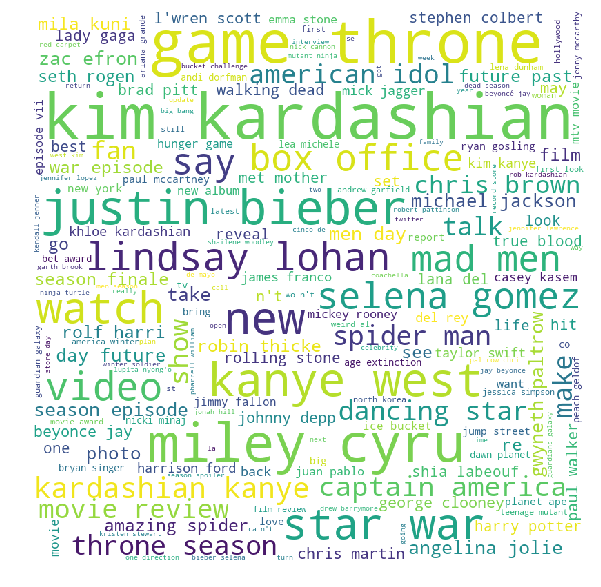

In [79]:
#Applying word cloud for Entertiment  dataset 
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(Entert.to_string()) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [83]:
norm_Bus= np.vectorize(Business)

In [110]:
bus=df[df['CATEGORY']=='b'].head(2000)

In [105]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [111]:
norm_corpus = normalize_corpus(bus['TITLE'])
norm_corpus

array(['fed official says weak data caused weather slow taper',
       'feds charles plosser sees high bar change pace tapering',
       'us open stocks fall fed official hints accelerated tapering', ...,
       'mens wearhouse jos bank suit b deal',
       'stocks end day choppy trading lower',
       'mens wearhouse strikes billion deal buy jos bank'], dtype='<U77')

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,aa,aal,aapl,abercrombie,aboard,abusing,accelerate,accelerated,access,account,...,yield,yields,yonkers,york,young,youth,yuan,zacks,zeidan,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.43,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
5,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
6,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
7,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00


In [113]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1.000000,0.000000,0.260427,0.183749,0.117242,0.149057,0.348638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.128941,0.243401,0.255754,0.406717,0.407132,0.271416,0.237563,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.260427,0.128941,1.000000,0.130823,0.000000,0.308278,0.000000,0.126183,0.034118,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.052500,0.000000
3,0.183749,0.243401,0.130823,1.000000,0.127281,0.280698,0.134432,0.135076,0.254110,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.117242,0.255754,0.000000,0.127281,1.000000,0.146004,0.314130,0.315635,0.192650,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.149057,0.406717,0.308278,0.280698,0.146004,1.000000,0.428947,0.154945,0.131074,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.348638,0.407132,0.000000,0.134432,0.314130,0.428947,1.000000,0.333366,0.131207,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.271416,0.126183,0.135076,0.315635,0.154945,0.333366,1.000000,0.170238,0.092983,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.128053,0.000000
8,0.000000,0.237563,0.034118,0.254110,0.192650,0.131074,0.131207,0.170238,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092983,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.115450,0.000000


In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,1920,1927,0,2
1,1853,1855,0,2
2,1017,1033,0,2
3,1562,1568,0,2
4,842,893,0,2
5,944,950,0,2
6,615,636,0,2
7,1020,1110,0,2
8,16,20,0,2
9,1769,1770,0,2


In [118]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


,T1,T2,T3
0,0.033755,0.924234,0.042011
1,0.034435,0.929031,0.036534
2,0.033590,0.932883,0.033526
3,0.038065,0.923552,0.038383
4,0.041846,0.693348,0.264806
5,0.048332,0.903470,0.048198
6,0.048305,0.903518,0.048177
7,0.041751,0.914578,0.043671
8,0.167037,0.648389,0.184574
9,0.048879,0.042995,0.908127


In [119]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('bank', 114.88059074339952), ('colorado', 109.73210311614699), ('chiquita', 91.0986216432405), ('banana', 79.38799954274447), ('fyffes', 69.62847187988623), ('marijuana', 61.87638718712787), ('mens', 61.36123199557801), ('pot', 60.89860533376053), ('million', 59.49092201473699), ('taxes', 58.94537244719443), ('wearhouse', 58.239151260319595), ('jos', 58.235989189492926), ('fannie', 56.05647087321359), ('sales', 47.94681662017061), ('freddie', 47.257516261070705), ('merger', 46.38775041070628), ('public', 45.182650946798), ('billion', 42.32203397085899), ('month', 39.382979286425446), ('england', 38.41585191389522), ('transit', 38.36572485555993), ('first', 37.40420661666854), ('worlds', 35.4723323017592), ('deal', 35.46295064125984), ('top', 34.46586679736758), ('loss', 31.18620436246717), ('recreational', 29.639197436514863), ('carney', 29.42173654613359), ('tax', 28.661304448155978), ('record', 28.42935043474984), ('unicredit', 25.71345977947097), ('merge', 25.32206186626313), ('bi

In [127]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
result=pd.concat([df, cluster_labels], axis=1)

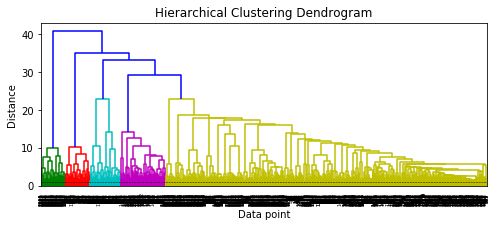

In [116]:
%matplotlib inline
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [146]:
result.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,tokens,Test,ClusterLabel
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,2014-03-10 16:52:50.698,"[Fed, official, says, weak, data, caused, by, ...","[fed, official, say, weak, data, caused, weath...",Stock
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,2014-03-10 16:52:51.207,"[Fed, s, Charles, Plosser, sees, high, bar, fo...","[fed, 's, charles, plosser, see, high, bar, ch...",Stock
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.550,"[US, open, Stocks, fall, after, Fed, official,...","[u, open, stock, fall, fed, official, hint, ac...",Stock
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,2014-03-10 16:52:51.793,"[Fed, risks, falling, behind, the, curve, Char...","[fed, risk, falling, 'behind, curve, charles, ...",Stock
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,2014-03-10 16:52:52.027,"[Fed, s, Plosser, Nasty, Weather, Has, Curbed,...","[fed, 's, plosser, nasty, weather, curbed, job...",Stock


In [142]:
result.ClusterLabel.replace({0.0:'Stock',1.0:'Banking',2.0:'Industry',3.0:'Others'},inplace=True)

In [ ]:

result.ClusterLabel.replace({"0.0":"PRICE","1.0":"STOCK","low fat":"Low Fat"},inplace=True)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [90]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer())])

In [93]:
categories = df['CATEGORY']
titles = df['Test']
N = len(titles)

Ntrain = int(N * 0.7)

In [95]:
text_clf.fit_transform(X_train)

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

0    [fed, official, say, weak, data, caused, weath...
1    [fed, 's, charles, plosser, see, high, bar, ch...
2    [u, open, stock, fall, fed, official, hint, ac...
3    [fed, risk, falling, 'behind, curve, charles, ...
4    [fed, 's, plosser, nasty, weather, curbed, job...
Name: Test, dtype: object

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(df['Test'][0])
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,caused,data,fed,official,say,slow,taper,weak,weather
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Bag of Words Representation using our own tokenizer.
vectorizer = CountVectorizer(lowercase=False, tokenizer=tokenize)
x = vectorizer.fit_transform(df['TITLE'])

# Create numerical labels.
encoder = LabelEncoder()
y = encoder.fit_transform(df['CATEGORY'])

# Let's keep this in order to interpret our results later,
encoder_mapping = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))

# Split into a training and test set. Classifiers will be trained on the former and the final
# results will be reported on the latter.
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def report_accuracy(trained_clf):
    train_score = trained_clf.score(x_train, y_train)
    test_score = trained_clf.score(x_test, y_test)
    print("Training set accuracy score is: {}".format(emphasize(train_score)))
    print("Test set accuracy score is: {}".format(emphasize(test_score)))
    
# Let's use all our cores to speed things up.
n_cores = max(multiprocessing.cpu_count(), 1)

rf = RandomForestClassifier(n_jobs=n_cores)
rf.fit(x_train, y_train)
report_accuracy(rf)

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\266251\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\266251\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True